In [1]:
# Gini Index before splitting
total_samples = 300
positive = 220
negative = 80

p_pos = positive / total_samples
p_neg = negative / total_samples

gini_before = 1 - (p_pos**2 + p_neg**2)
print(f"Gini Index before split: {gini_before:.4f}")

Gini Index before split: 0.3911


In [2]:
# Gini Index after split
left_pos = 90
left_neg = 10
right_pos = 100
right_neg = 100

left_total = left_pos + left_neg
right_total = right_pos + right_neg

gini_left = 1 - ((left_pos / left_total)**2 + (left_neg / left_total)**2)
gini_right = 1 - ((right_pos / right_total)**2 + (right_neg / right_total)**2)

weighted_gini = (left_total / total_samples) * gini_left + (right_total / total_samples) * gini_right
print(f"Weighted Gini Index after split: {weighted_gini:.4f}")

if weighted_gini < gini_before:
    print("The split improves purity.")
else:
    print("The split does not improve purity.")

Weighted Gini Index after split: 0.3933
The split does not improve purity.


In [3]:
import pandas as pd
import numpy as np

# Given dataset
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8],
    'X2': [5, 6, 8, 10, 12, 15, 18, 20],
    'Y':  [10, 12, 15, 18, 21, 25, 28, 30]
})
data

,X1,X2,Y
0,1,5,10
1,2,6,12
2,3,8,15
3,4,10,18
4,5,12,21
5,6,15,25
6,7,18,28
7,8,20,30


In [4]:
# Function to calculate SSE for a given split
def calculate_sse(y_values):
    mean = np.mean(y_values)
    return np.sum((y_values - mean) ** 2)

# Try all possible splits and calculate SSE for each
def best_split_sse(feature):
    unique_vals = sorted(data[feature].unique())
    best_sse = float('inf')
    best_split = None

    for i in range(1, len(unique_vals)):
        split_val = (unique_vals[i-1] + unique_vals[i]) / 2
        left_y = data[data[feature] <= split_val]['Y']
        right_y = data[data[feature] > split_val]['Y']

        sse = calculate_sse(left_y) + calculate_sse(right_y)

        if sse < best_sse:
            best_sse = sse
            best_split = split_val

    return best_split, best_sse

split_x1, sse_x1 = best_split_sse('X1')
split_x2, sse_x2 = best_split_sse('X2')

print(f"Best split for X1: {split_x1}, SSE: {sse_x1:.2f}")
print(f"Best split for X2: {split_x2}, SSE: {sse_x2:.2f}")

if sse_x1 < sse_x2:
    print(f"Choose X1 with split at {split_x1}")
else:
    print(f"Choose X2 with split at {split_x2}")

Best split for X1: 4.5, SSE: 82.75
Best split for X2: 11.0, SSE: 82.75
Choose X2 with split at 11.0


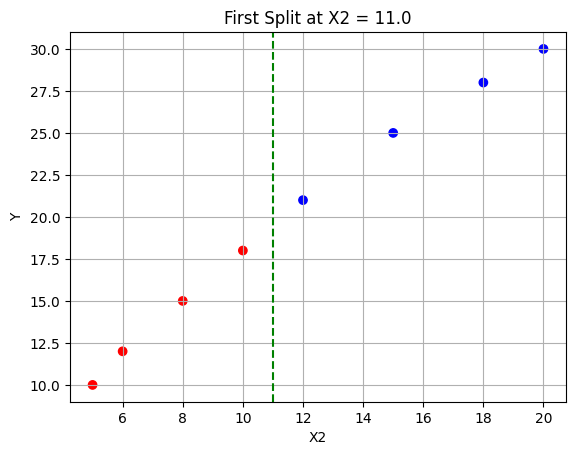

In [5]:
# Let's visualize how the split divides the data
import matplotlib.pyplot as plt

best_feature = 'X1' if sse_x1 < sse_x2 else 'X2'
best_split = split_x1 if sse_x1 < sse_x2 else split_x2

plt.scatter(data[best_feature], data['Y'], c=['red' if val <= best_split else 'blue' for val in data[best_feature]])
plt.axvline(x=best_split, color='green', linestyle='--')
plt.xlabel(best_feature)
plt.ylabel('Y')
plt.title(f'First Split at {best_feature} = {best_split}')
plt.grid(True)
plt.show()